# Import neccessary libraries

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read Data Using Pandas

In [186]:
core_data = pd.read_excel(r"C:\Users\OMO_MUSHIN\Documents\Volve-Core_Data_2.xlsx", na_values=' ')
core_data.head()

,CORE_NO,Sample,Depth,CKGH,INV_PMH,CKH,CKGV,INV_PMV,CKV,CPOR,CPOR_VERT,SUM_POR,So,Sw,RHOD,GRAIN_RHO,Lithological description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,3837.00,13.8,0.662,11.5,,,,17,,,,,2.66,,Sst.lt-Brn.M-gr.Ang.W-cmt.Fr-srt.mtrx.frac.w/M...
3,1.0,2.0,3837.25,NaN,,NaN,,,,14.8,,,,,2.67,,"A.A.fis.Cl/Mic-lam.w/o frac.w/Dol,Sid,Cl."
4,1.0,3.0,3837.55,25.2,0.746,21.4,3.94,0.495,3.16,10.8,,,,,2.69,,A.A.VW-cmt.w/o fis.Cl/Mic-lam.incr Dol.


# Exploratory Data Analysis 

In [187]:
indexes_to_drop =[0, 1]

core_data.drop(index=indexes_to_drop, inplace=True)
core_data.drop(['Lithological description', 'CORE_NO', 'Sample'], axis=1, inplace=True)
# core_data.drop(['Lithological description',  'INV_PMH',\
#                 'INV_PMV','CKGV','CKGH', 'CKV', 'CPOR_VERT', 'SUM_POR', 'GRAIN_RHO',\
#                'So', 'Sw'], axis=1, inplace=True)
core_data.reset_index()

core_data.head()


,Depth,CKGH,INV_PMH,CKH,CKGV,INV_PMV,CKV,CPOR,CPOR_VERT,SUM_POR,So,Sw,RHOD,GRAIN_RHO
2,3837.00,13.8,0.662,11.5,,,,17,,,,,2.66,
3,3837.25,NaN,,NaN,,,,14.8,,,,,2.67,
4,3837.55,25.2,0.746,21.4,3.94,0.495,3.16,10.8,,,,,2.69,
5,3837.80,1.02,0.495,0.694,,,,12.8,,,,,2.7,
6,3837.88,,,,,,,,18.8,,52.9,36.4,,2.68


In [188]:
# Converting all data to numeric data
core_data = core_data.apply(pd.to_numeric, errors='coerce')


# Summary statistics
core_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,728.0,3920.153338,46.902816,3837.000,3881.980,3921.125,3960.4875,3999.750
CKGH,557.0,649.801463,2160.127387,0.018,2.620,59.900,213.0000,20800.000
INV_PMH,557.0,0.765614,0.207490,0.495,0.495,0.855,0.9670,0.999
CKH,557.0,627.972549,2116.307023,0.010,2.030,52.300,194.0000,20500.000
CKGV,141.0,490.086071,1973.601098,0.030,0.874,27.300,108.0000,14800.000
INV_PMV,141.0,0.724369,0.203974,0.495,0.495,0.746,0.9070,0.999
CKV,141.0,472.875284,1929.420018,0.017,0.590,23.300,96.3000,14500.000
CPOR,593.0,16.829342,6.552523,2.900,12.000,18.100,21.7000,36.000
CPOR_VERT,71.0,19.497183,5.657763,2.700,18.150,21.200,23.5000,27.800
SUM_POR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# Check for missing values
core_data.isnull().sum()

Depth          0
CKGH         171
INV_PMH      171
CKH          171
CKGV         587
INV_PMV      587
CKV          587
CPOR         135
CPOR_VERT    657
SUM_POR      728
So           657
Sw           657
RHOD         134
GRAIN_RHO    657
dtype: int64

In [190]:
# Getting the number of Null Values for each columns
core_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 2 to 729
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      728 non-null    float64
 1   CKGH       557 non-null    float64
 2   INV_PMH    557 non-null    float64
 3   CKH        557 non-null    float64
 4   CKGV       141 non-null    float64
 5   INV_PMV    141 non-null    float64
 6   CKV        141 non-null    float64
 7   CPOR       593 non-null    float64
 8   CPOR_VERT  71 non-null     float64
 9   SUM_POR    0 non-null      float64
 10  So         71 non-null     float64
 11  Sw         71 non-null     float64
 12  RHOD       594 non-null    float64
 13  GRAIN_RHO  71 non-null     float64
dtypes: float64(14)
memory usage: 79.8 KB


Started histogram
Stopped


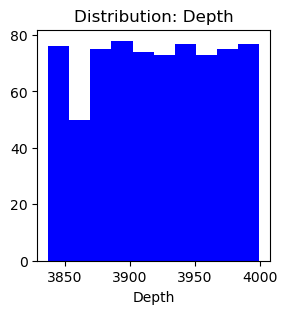

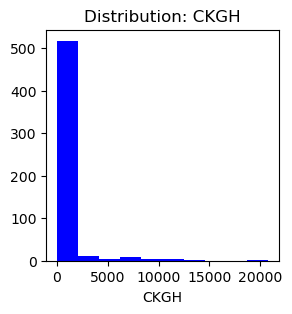

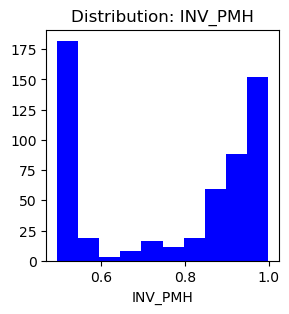

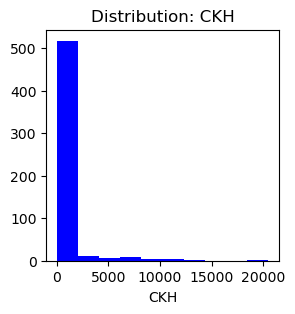

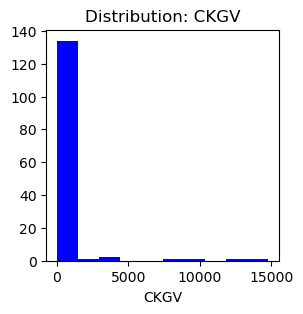

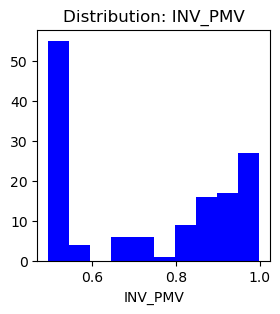

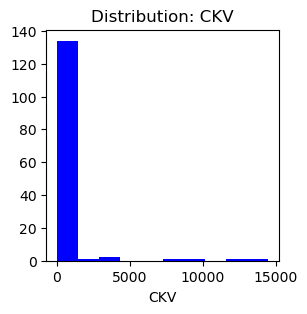

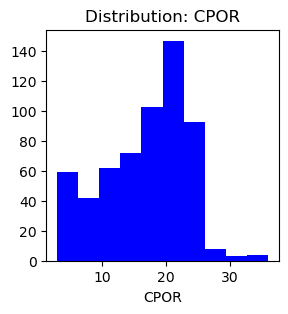

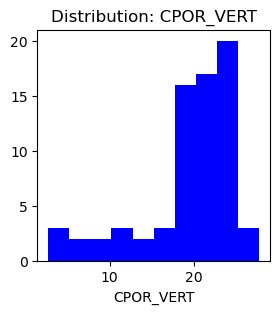

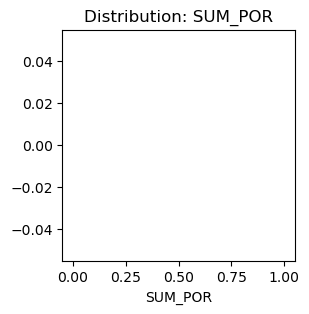

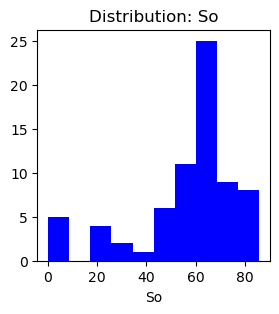

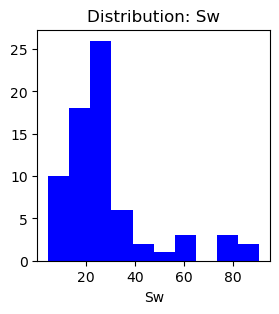

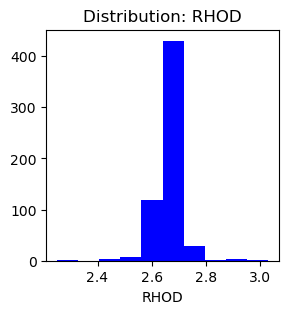

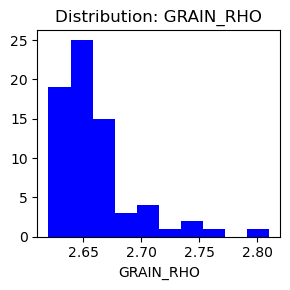

In [191]:
hue_color = 'blue'
print('Started histogram')

for col in core_data.columns.values:
    fig, axes = plt.subplots(figsize=(3, 3))
    
    # Drop NaN values before plotting the histogram
    histplot_data = core_data[col].dropna()
    
    plt.hist(histplot_data, color=hue_color)
    axes.set_xlabel(col)
    axes.set_title('Distribution: {}'.format(col))
    
plt.tight_layout()

print('Stopped')


Columns 'INV_PMH','INV_PMV','CKGV','CKGH', 'CPOR_VERT', 'SUM_POR' are labouratory parameters and henced should be dropped since we intend on using reservoir parameters to estimate permeability

In [192]:
# Dropping columns containing labouratory parameters

core_data.drop(['INV_PMH',\
                'INV_PMV','CKGV','CKGH', 'CPOR_VERT', 'SUM_POR'], axis=1, inplace=True)
core_data.set_index('Depth')
core_data

,Depth,CKH,CKV,CPOR,So,Sw,RHOD,GRAIN_RHO
2,3837.00,11.500,NaN,17.0,NaN,NaN,2.66,NaN
3,3837.25,NaN,NaN,14.8,NaN,NaN,2.67,NaN
4,3837.55,21.400,3.16,10.8,NaN,NaN,2.69,NaN
5,3837.80,0.694,NaN,12.8,NaN,NaN,2.70,NaN
6,3837.88,NaN,NaN,NaN,52.9,36.4,NaN,2.68
...,...,...,...,...,...,...,...,...
725,3998.85,4850.000,NaN,28.9,NaN,NaN,2.65,NaN
726,3999.00,3350.000,NaN,20.7,NaN,NaN,2.66,NaN
727,3999.25,3490.000,NaN,20.9,NaN,NaN,2.64,NaN
728,3999.50,163.000,448.00,17.3,NaN,NaN,2.64,NaN


C:\Users\OMO_MUSHIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


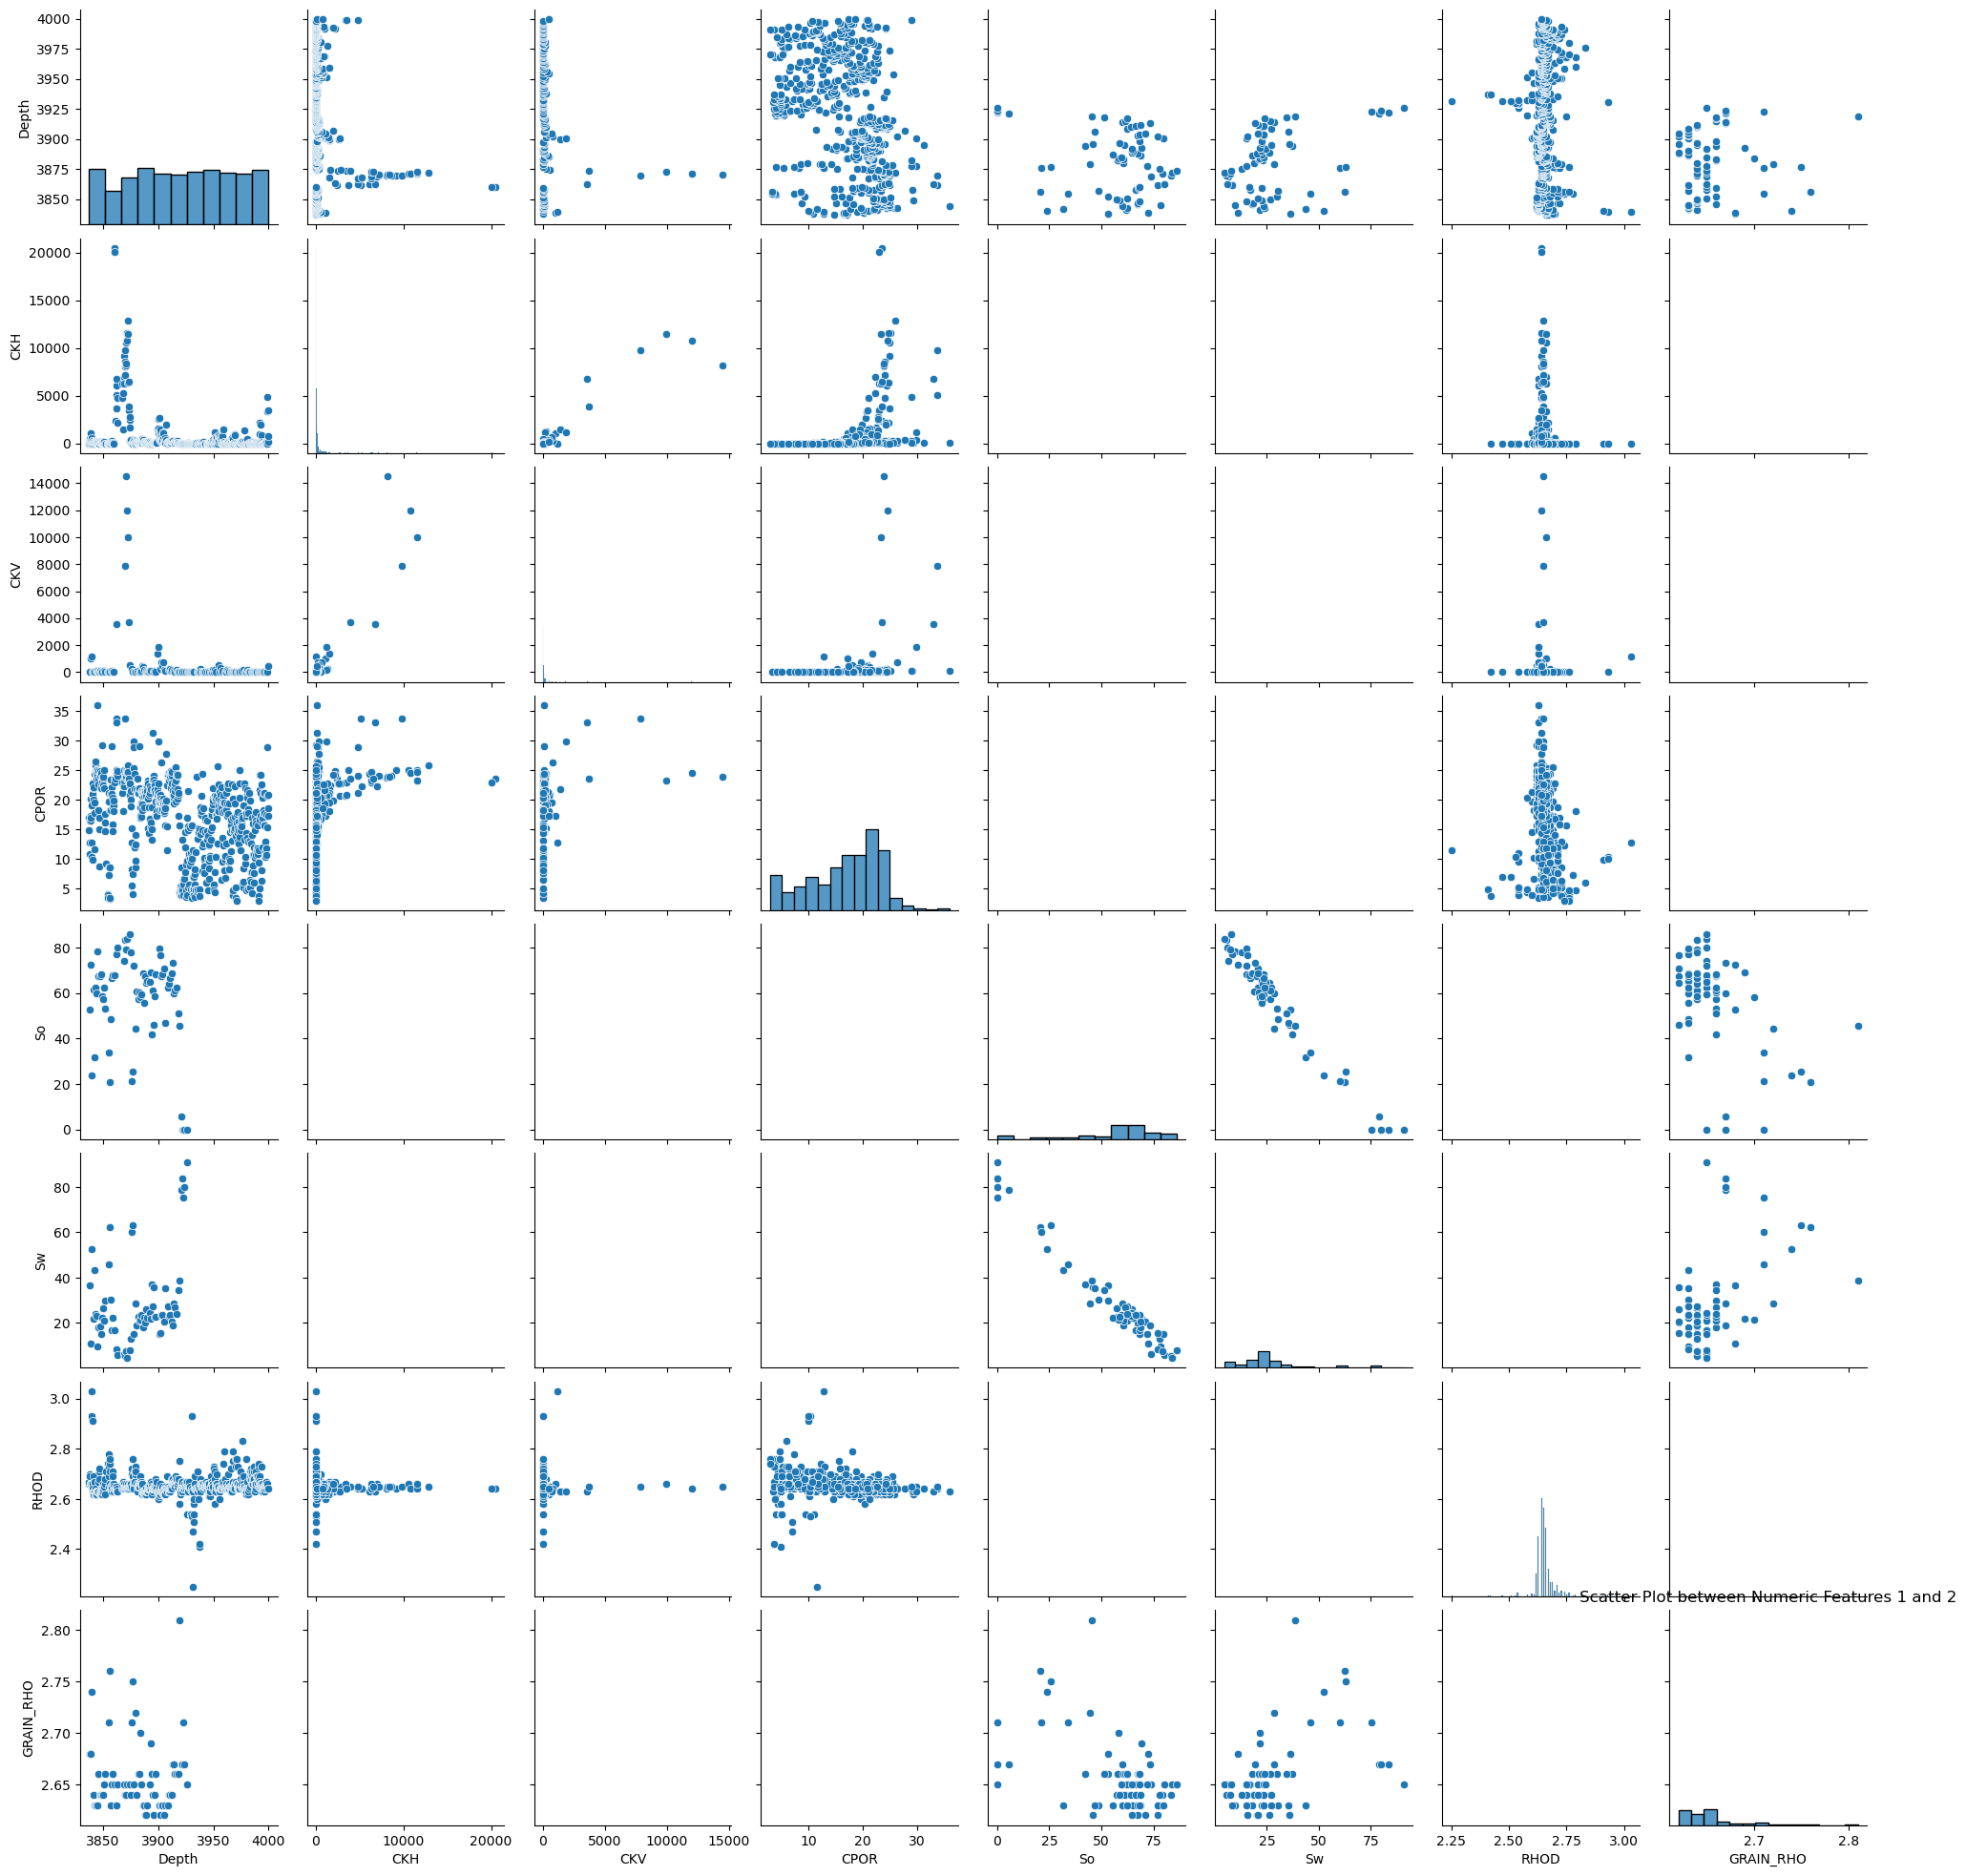

In [193]:
 import seaborn as sns
# Scatterplot between all features
sns.pairplot(core_data)


plt.title('Scatter Plot between Numeric Features 1 and 2')
plt.show()


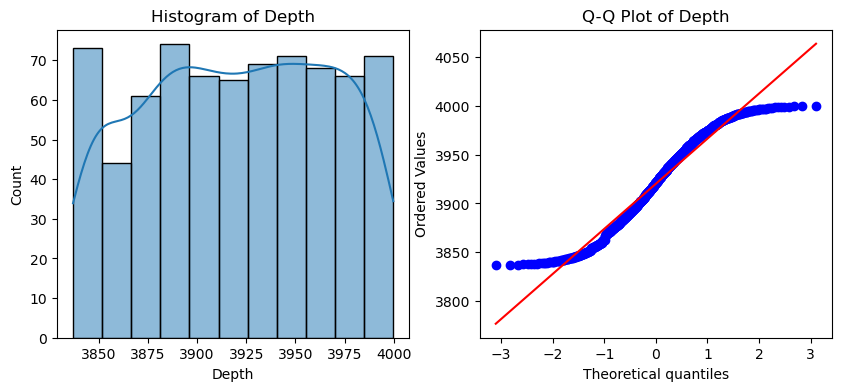

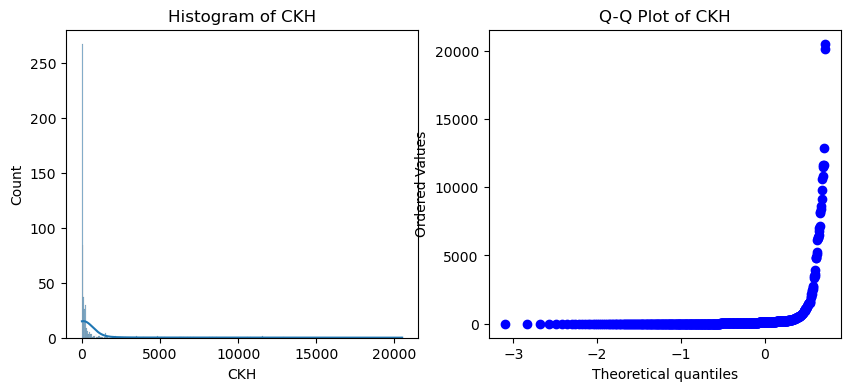

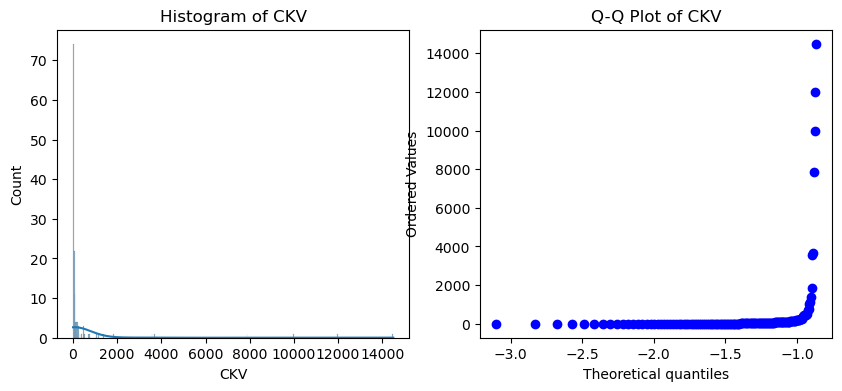

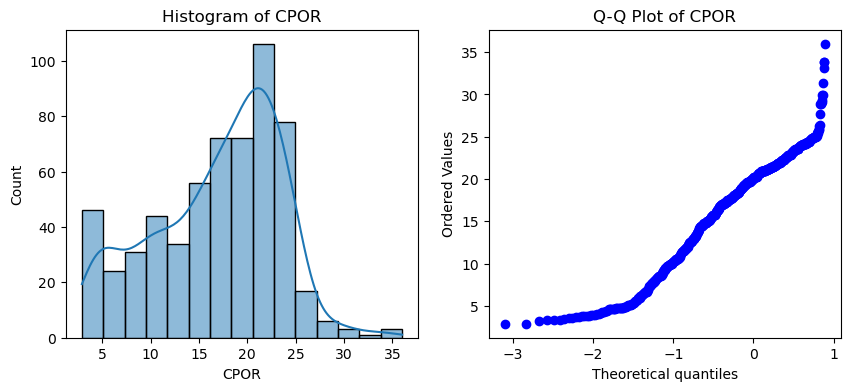

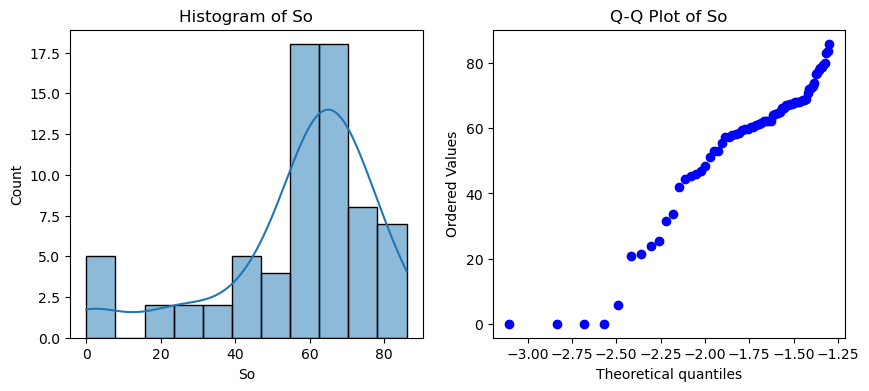

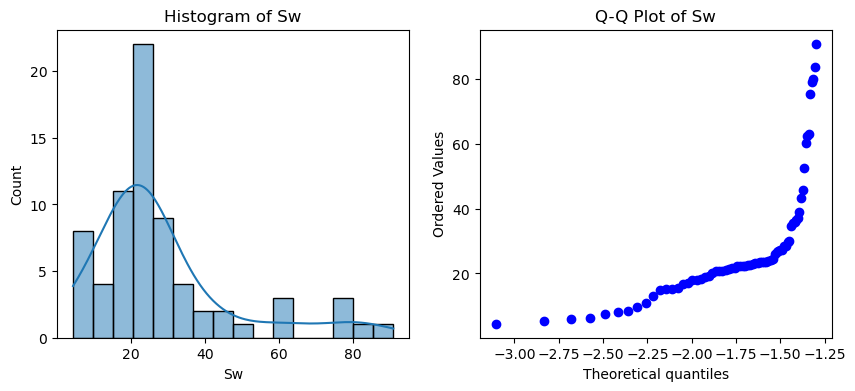

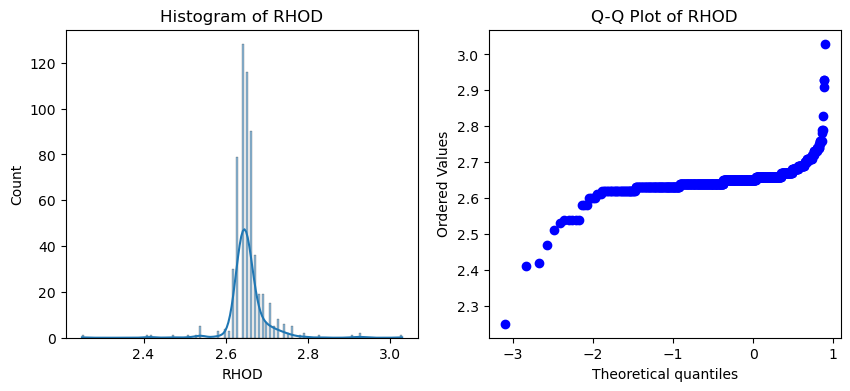

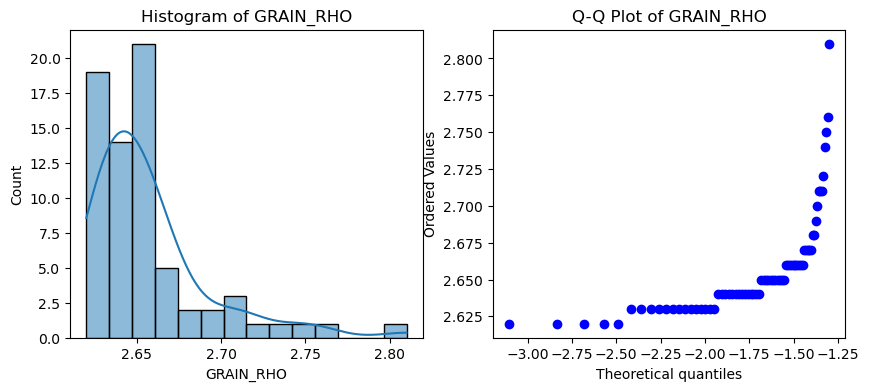

In [194]:
import scipy.stats as stats


for col in core_data.columns:
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    # Plot histogram
    sns.histplot(core_data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    # Plot Q-Q plot
    stats.probplot(core_data[col], dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q Plot of {col}')

    plt.show()


In [195]:
# Checking the level of skew in the data

In [196]:
core_data_skewed = core_data.skew(numeric_only=True)
core_data_skewed

Depth       -0.069337
CKH          5.419010
CKV          5.659770
CPOR        -0.389141
So          -1.411998
Sw           1.691781
RHOD         0.510444
GRAIN_RHO    2.066945
dtype: float64

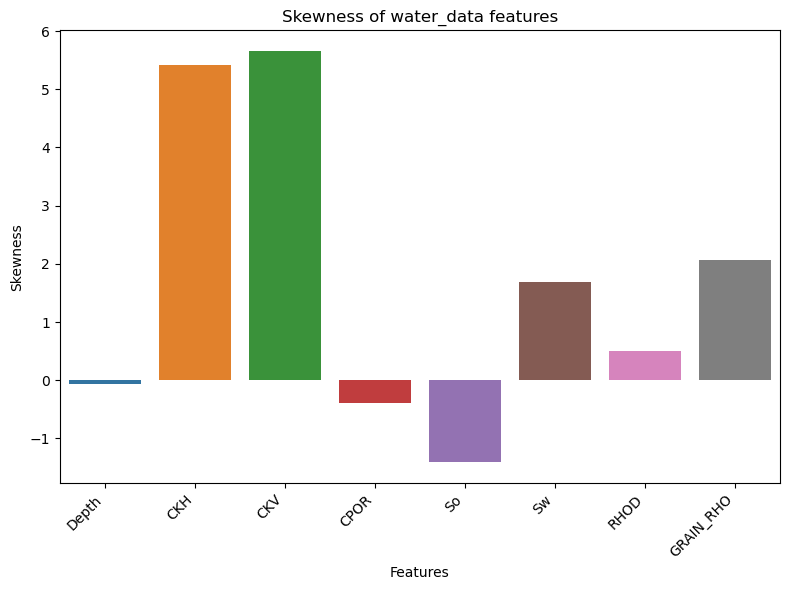

In [197]:
plt.figure(figsize=(8, 6))
sns.barplot(x=core_data_skewed.index, y=core_data_skewed)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of water_data features')
plt.tight_layout()
plt.show()

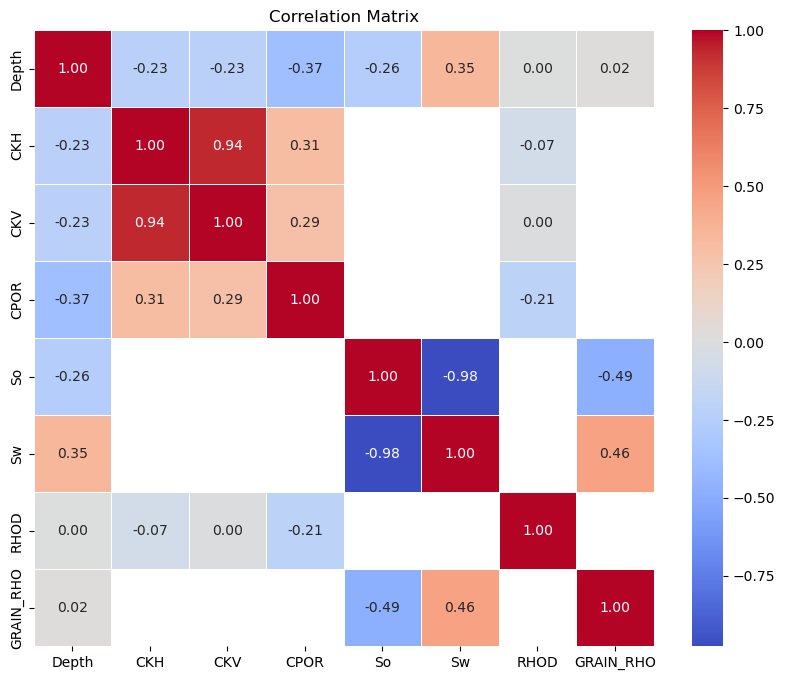

In [198]:
# Using a heatmap to check correlations between features of the core for feature selection and engineering

plt.figure(figsize=(10, 8))
sns.heatmap(core_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [199]:
# Dropping the CKV column to reduce data redundancy and improve computabilty

core_data = core_data.drop('CKV', axis=1)

In [200]:
# Dropping the RHOD and GRAIN_RHO columns since it is fairly costant and doesnt offer much variabilty.

core_data = core_data.drop(['GRAIN_RHO', 'RHOD'], axis=1)

In [201]:
#Using backward fill for Nan Values of Sw and So columns
core_data.columns

Index(['Depth', 'CKH', 'CPOR', 'So', 'Sw'], dtype='object')

In [202]:
# backfill_data = ['So', 'Sw']

# core_data[backfill_data] = core_data[backfill_data].fillna(method='bfill', axis=0, inplace=False)

# core_data

# Handling na Values

In [203]:
core_data.isna().sum()

Depth      0
CKH      171
CPOR     135
So       657
Sw       657
dtype: int64

In [204]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
core_data_imputed = pd.DataFrame(imputer.fit_transform(core_data), columns=core_data.columns)

core_data_imputed

,Depth,CKH,CPOR,So,Sw
0,3837.00,11.5000,17.00,48.52,32.98
1,3837.25,233.6388,14.80,48.52,32.98
2,3837.55,21.4000,10.80,48.52,32.98
3,3837.80,0.6940,12.80,48.52,32.98
4,3837.88,369.2188,14.74,52.90,36.40
...,...,...,...,...,...
723,3998.85,4850.0000,28.90,1.14,81.74
724,3999.00,3350.0000,20.70,1.14,81.74
725,3999.25,3490.0000,20.90,1.14,81.74
726,3999.50,163.0000,17.30,1.14,81.74


# Exploratory Data Analysis

In [205]:
# core_data

In [206]:
# core_data.dropna()


In [207]:
core_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Depth,728.0,3920.153338,46.902816,3837.00,3881.98,3921.125,3960.4875,3999.75
CKH,557.0,627.972549,2116.307023,0.01,2.03,52.300,194.0000,20500.00
CPOR,593.0,16.829342,6.552523,2.90,12.00,18.100,21.7000,36.00
So,71.0,56.943662,21.084319,0.00,52.00,62.300,68.5000,86.00
Sw,71.0,28.309859,19.203758,4.50,18.20,22.800,29.9500,90.80


In [208]:
# # core_data.corr()
# core_data[:5]

In [209]:
# core_data.info()

In [210]:
# core_data = core_data.apply(pd.to_numeric, errors='coerce')


# # core_data['Sw'].fillna(method='bfill', inplace=True)
# # core_data['So'].fillna(method='bfill', inplace=True)

# core_data = core_data.dropna()


# core_data.info()

# core_data.corr()

# Outlier Detection And Removal

In [211]:
core_data = core_data_imputed
    
for feature in core_data.columns.values:
    Q1 = core_data[feature].quantile(0.25)
    
    Q3 = core_data[feature].quantile(0.75)
    
    IQR = Q3- Q1
    
    step = 1.5 * IQR
    
    outliers = core_data[(core_data[feature] < Q1 - step) | (core_data[feature] > Q3 + step)]
display(f'Number of Outliers: {len(outliers)}')    
display(f'Outliers: {outliers}')
good_data = core_data.drop(outliers.index)


'Number of Outliers: 0'

'Outliers: Empty DataFrame\nColumns: [Depth, CKH, CPOR, So, Sw]\nIndex: []'

# Experimenting a regression fit between features to estimate CKH, core permeability


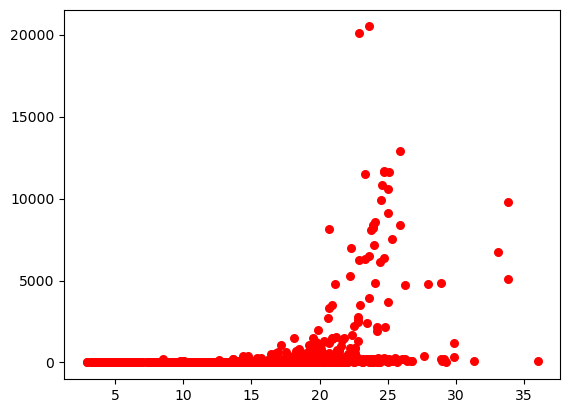

In [212]:
plt.scatter(core_data['CPOR'], core_data['CKH'], c='red', s=30)
plt.show()

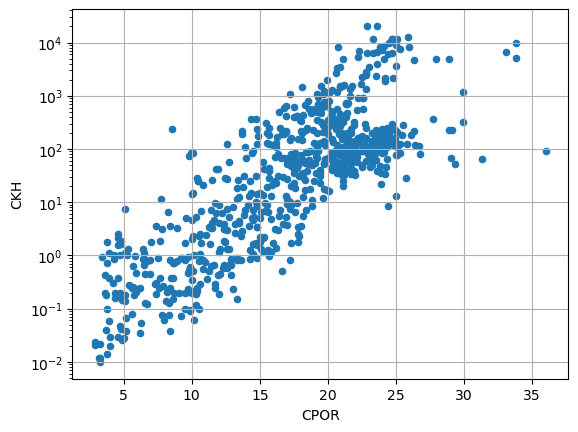

In [213]:
core_data.plot(kind="scatter", x="CPOR", y="CKH")
plt.yscale('log')
plt.grid(True)

In [214]:
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter


poro_perm = core_data[['CPOR', 'CKH']].copy()
poro_perm.dropna(inplace=True)

# Polyfit for comparison
poro_perm_polyfit = np.polyfit(core_data['CPOR'], np.log10(core_data['CKH']), 1)

# Display regression equation for polyfit
polyfit_equation = f'y = {poro_perm_polyfit[1]:.4f} + {poro_perm_polyfit[0]:.4f} * x'
print("Polyfit Equation:", polyfit_equation)


Polyfit Equation: y = -1.4833 + 0.1710 * x


In [215]:
#Getting Least Square Equation
x = core_data['CPOR']
x = sm.add_constant(x)
y = np.log(core_data['CKH'])

model = sm.OLS(y, x, missing='drop')
results = model.fit()

# Display OLS regression equation
ols_equation = f'y = {results.params[0]:.4f} + {results.params[1]:.4f} * x'
print("OLS Regression Equation:", ols_equation)


OLS Regression Equation: y = -3.4154 + 0.3938 * x


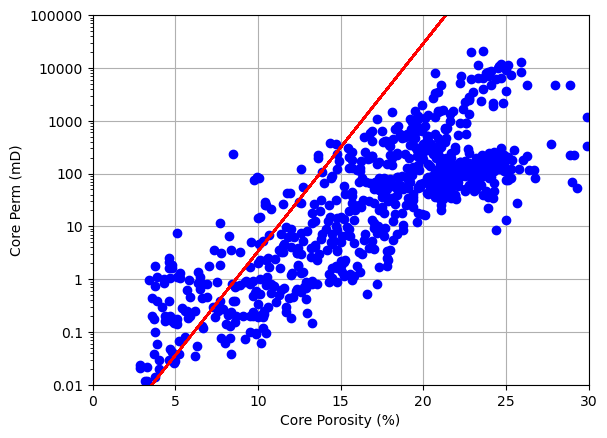

In [216]:
# Plotting regression plot
fig, ax = plt.subplots()

ax.axis([0, 30, 0.01, 100000])
ax.semilogy(core_data['CPOR'], core_data['CKH'], 'bo')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(core_data['CPOR'], 10**(results.params[1] * core_data['CPOR'] + results.params[0]), 'r-')

# Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

plt.grid(True)
plt.show()


In [217]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CKH   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1525.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          1.36e-180
Time:                        02:44:25   Log-Likelihood:                -1432.0
No. Observations:                 728   AIC:                             2868.
Df Residuals:                     726   BIC:                             2877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4154      0.181    -18.850      0.000      -3.771      -3.060
CPOR           0.3938      0.010     39.057      0.000       0.374       0.414
==============================================================================
Omnibus:                       11.286   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.632
Skew:                           0.212   Prob(JB):                      0.00810
Kurtosis:                       2.628   Cond. No.                         50.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
core_data = core_data.set_index("Depth", drop= True)


core_data

,CKH,CPOR,So,Sw
Depth,,,,
3837.00,11.5000,17.00,48.52,32.98
3837.25,233.6388,14.80,48.52,32.98
3837.55,21.4000,10.80,48.52,32.98
3837.80,0.6940,12.80,48.52,32.98
3837.88,369.2188,14.74,52.90,36.40
...,...,...,...,...
3998.85,4850.0000,28.90,1.14,81.74
3999.00,3350.0000,20.70,1.14,81.74
3999.25,3490.0000,20.90,1.14,81.74


# Feature Scaling

In [219]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scale = StandardScaler()

X = core_data.drop('CKH', axis=1)
y = core_data['CKH']

X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns.values

X = X_scaled
# X = pd.DataFrame(X_scaled)
# X.columns = ['CPOR', "RHOD"]
X

,CPOR,So,Sw
0,0.030743,0.580653,-0.704739
1,-0.314733,0.580653,-0.704739
2,-0.942871,0.580653,-0.704739
3,-0.628802,0.580653,-0.704739
4,-0.324155,0.723297,-0.587291
...,...,...,...
723,1.899453,-0.962384,0.969753
724,0.611770,-0.962384,0.969753
725,0.643177,-0.962384,0.969753
726,0.077853,-0.962384,0.969753


Fitting a multiple regression plot between all other features to estimate CKH, Core permeability

Fitting and Visualizing a Multiple regression model on the data

Coefficients: [ 333.68515207 2388.68036149 1845.11291301]
Intercept: 615.2866926851635


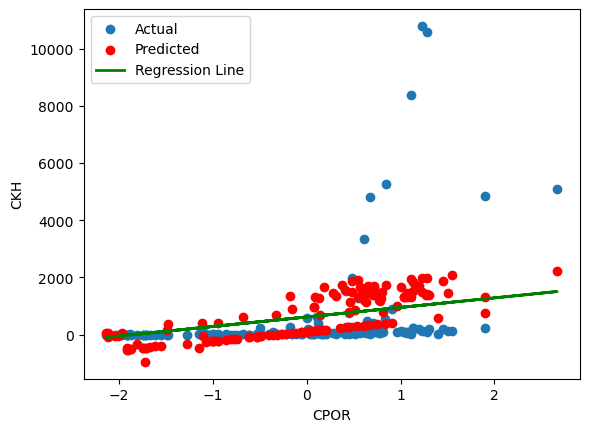

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.scatter(X_test['CPOR'], y_pred, label='Predicted', color='red')
plt.plot(X_test['CPOR'], intercept + coefficients[0] * X_test['CPOR'], color='green', linewidth=2, label='Regression Line')
plt.xlabel('CPOR')
plt.ylabel('CKH')

# plt.yscale('log')
plt.legend()
plt.show()


In [221]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

2436780.1439684704


1561.0189441414445

In [222]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.08622640305569862

Coefficients: [-8.62119125e-08  1.53355984e+03 -1.19592825e+04 -8.53107439e+03
  6.18729741e+02  4.14913435e+03  7.11514702e+03 -2.41153305e+04
 -5.40400284e+04 -2.91002078e+04  5.37617578e+01  8.59043461e+03
  8.79734014e+03 -4.94801811e+04 -7.17016128e+04 -2.37099595e+04
  2.42293272e+05  6.38659933e+05  5.73459966e+05  1.73290943e+05
  1.25574076e+01  9.04344654e+02  9.63591732e+02  1.84920589e+03
  1.52124139e+04  1.26274697e+04 -1.38787705e+05 -4.57046470e+05
 -4.69323128e+05 -1.54564691e+05  3.08874178e+05  1.44887381e+06
  2.40834265e+06  1.72200761e+06  4.51971633e+05]
Intercept: 819.9870737015179


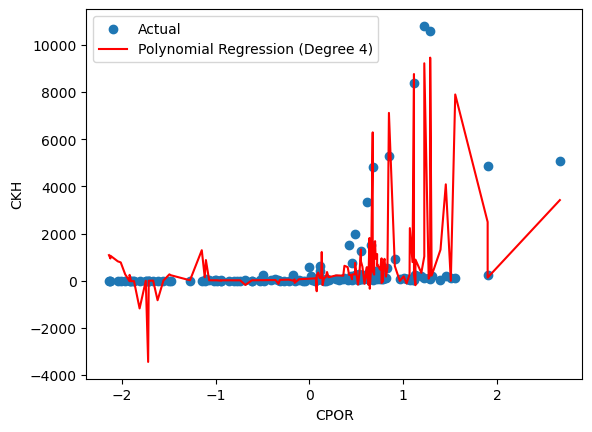

In [239]:
#Splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Polynomial Regression with degree n
degree = 4
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

# Plot the regression equation on a scatter plot
X_test_sorted = X_test.sort_values(by='CPOR')  # Sort for better visualization
y_pred_poly = model.predict(poly.transform(X_test_sorted))
plt.scatter(X_test['CPOR'], y_test, label='Actual')
plt.plot(X_test_sorted['CPOR'], y_pred_poly, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('CPOR')
plt.ylabel('CKH')
# plt.yscale('log')
plt.legend()
plt.show()


In [240]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2

0.603615583463827

In [226]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

mae

510.4783383136639

In [227]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


print(mse)
rmse = np.sqrt(mse)
rmse

1057047.0396867353


1028.1279296307125

In [242]:
X

,CPOR,So,Sw
0,0.030743,0.580653,-0.704739
1,-0.314733,0.580653,-0.704739
2,-0.942871,0.580653,-0.704739
3,-0.628802,0.580653,-0.704739
4,-0.324155,0.723297,-0.587291
...,...,...,...
723,1.899453,-0.962384,0.969753
724,0.611770,-0.962384,0.969753
725,0.643177,-0.962384,0.969753
726,0.077853,-0.962384,0.969753


# Using TensorFlow

In [241]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

from tensorflow.keras.layers import Dense

Model 1

In [244]:
# from keras.optimizers import Adam


# model = keras.Sequential([
#     Dense(200, activation='relu', input_shape=(3,)),
#     Dense(150, activation='relu'),
#     Dense(75, activation='relu'),
#     Dense(25, activation='relu'),
#     Dense(1, activation='linear')
# ], name="my_model")

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# # Train the model
# epochs = 50  # You can adjust the number of epochs
# batch_size = 32  # You can adjust the batch size
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# # Evaluate the model
# loss, mae = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}, Test MAE: {mae}')

# # You can also make predictions using the trained model
# predictions = model.predict(X_test)


Model 2

In [245]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)

print(f'Test MAE (Random Forest): {mae_rf}')
print(f'Test MSE (Random Forest): {mse_rf}')


Test MAE (Random Forest): 286.40480161353395
Test MSE (Random Forest): 881460.2673184642


In [247]:
r_squared = r2_score(y_test, rf_predictions)
print(f'R-squared (Random Forest): {r_squared}')

mean_true_values = y_test.mean()


mae_percentage = (mae_rf / mean_true_values) * 100


print(f'Test MAE (Random Forest): {mae_rf}')
print(f'Test MAE Percentage (Random Forest): {mae_percentage:.2f}%')

R-squared (Random Forest): 0.669459257116509
Test MAE (Random Forest): 286.40480161353395
Test MAE Percentage (Random Forest): 57.83%


# Model 3

In [250]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)


model = keras.Sequential([
    tf.keras.Input(shape=(3, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer = regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=100, verbose=2)

model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)



print('Done')

Epoch 1/100


59/59 - 3s - loss: 4759897.5000 - mae: 607.9127 - 3s/epoch - 46ms/step
Epoch 2/100
59/59 - 0s - loss: 4759897.0000 - mae: 607.9128 - 288ms/epoch - 5ms/step
Epoch 3/100
59/59 - 0s - loss: 4759895.5000 - mae: 607.9127 - 255ms/epoch - 4ms/step
Epoch 4/100
59/59 - 0s - loss: 4759897.0000 - mae: 607.9127 - 242ms/epoch - 4ms/step
Epoch 5/100
59/59 - 0s - loss: 4759544.0000 - mae: 607.7758 - 240ms/epoch - 4ms/step
Epoch 6/100
59/59 - 0s - loss: 4609542.0000 - mae: 588.0718 - 246ms/epoch - 4ms/step
Epoch 7/100
59/59 - 0s - loss: 3922103.5000 - mae: 689.1727 - 238ms/epoch - 4ms/step
Epoch 8/100
59/59 - 0s - loss: 3672164.7500 - mae: 894.8578 - 239ms/epoch - 4ms/step
Epoch 9/100
59/59 - 0s - loss: 3641988.7500 - mae: 857.7489 - 241ms/epoch - 4ms/step
Epoch 10/100
59/59 - 0s - loss: 3631299.7500 - mae: 843.6921 - 299ms/epoch - 5ms/step
Epoch 11/100
59/59 - 0s - loss: 3609668.5000 - mae: 851.8057 - 247ms/epoch - 4ms/step
Epoch 12/100
59/59 - 0s - loss: 3605918.7500 - mae: 866.2386 - 

59/59 - 0s - loss: 1740208.0000 - mae: 397.3511 - 274ms/epoch - 5ms/step
Epoch 92/100
59/59 - 0s - loss: 1707163.2500 - mae: 403.6361 - 232ms/epoch - 4ms/step
Epoch 93/100
59/59 - 0s - loss: 1706318.0000 - mae: 403.3643 - 237ms/epoch - 4ms/step
Epoch 94/100
59/59 - 0s - loss: 1699867.8750 - mae: 390.7102 - 273ms/epoch - 5ms/step
Epoch 95/100
59/59 - 0s - loss: 1684649.8750 - mae: 394.5127 - 232ms/epoch - 4ms/step
Epoch 96/100
59/59 - 0s - loss: 1686034.5000 - mae: 385.6774 - 275ms/epoch - 5ms/step
Epoch 97/100
59/59 - 0s - loss: 1700927.7500 - mae: 398.7595 - 227ms/epoch - 4ms/step
Epoch 98/100
59/59 - 0s - loss: 1698678.6250 - mae: 393.0318 - 274ms/epoch - 5ms/step
Epoch 99/100
59/59 - 0s - loss: 1705059.7500 - mae: 375.4848 - 280ms/epoch - 5ms/step
Epoch 100/100
59/59 - 0s - loss: 1672686.3750 - mae: 400.8429 - 233ms/epoch - 4ms/step
15/15 - 0s - loss: 908414.8125 - mae: 359.8612 - 337ms/epoch - 22ms/step
Done


Model 4

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error


target_range = y_train.max() - y_train.min()


y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range


norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.01)), 
    layers.Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=20, epochs=500, verbose=2)

# Evaluate the model
predictions_normalized = model.predict(Xn_test)
predictions = predictions_normalized * target_range + y_train.min()

mae_percentage = mean_absolute_error(y_test, predictions) / target_range * 100

print(f'Mean Absolute Error Percentage: {mae_percentage}%')
print(f'Target range: : {target_range}')

# Model 5

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

# Assuming y_train and y_test are your target variables

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    tf.keras.Input(shape=(3, )),
    Dense(512, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.01)),
    Dense(256, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='relu', name='L3',),
    Dense(1, activation='relu', name='L4')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=['mae']
)

model.fit(Xn, y_train, batch_size=10, epochs=300, verbose=2)

# Evaluate on training data
train_loss, train_mae = model.evaluate(Xn, y_train, batch_size=10, verbose=2)
train_mae_percentage = (train_mae / (max(y_train) - min(y_train))) * 100

# Evaluate on testing data
test_loss, test_mae = model.evaluate(Xn_test, y_test, batch_size=10, verbose=2)
test_mae_percentage = (test_mae / (max(y_test) - min(y_test))) * 100

print(f"Training MAE: {train_mae_percentage:.2f}% of target range")
print(f"Testing MAE: {test_mae_percentage:.2f}% of target range")



print('Done')


# Model 6

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(1200, activation='relu', name='L1'),
    layers.Dense(600, activation='relu', name='L2'),
    layers.Dense(450, activation='relu', name='L3'),
    layers.Dense(100, activation='relu', name='L4'), 
    layers.Dense(1, activation='linear', name='L5')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=1000, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')



Epoch 1/1000
59/59 - 3s - loss: 0.0084 - mae: 0.0449 - 3s/epoch - 47ms/step
Epoch 2/1000
59/59 - 1s - loss: 0.0075 - mae: 0.0400 - 890ms/epoch - 15ms/step
Epoch 3/1000
59/59 - 1s - loss: 0.0081 - mae: 0.0405 - 891ms/epoch - 15ms/step
Epoch 4/1000
59/59 - 1s - loss: 0.0073 - mae: 0.0399 - 934ms/epoch - 16ms/step
Epoch 5/1000
59/59 - 1s - loss: 0.0077 - mae: 0.0384 - 993ms/epoch - 17ms/step
Epoch 6/1000
59/59 - 1s - loss: 0.0067 - mae: 0.0358 - 926ms/epoch - 16ms/step
Epoch 7/1000
59/59 - 1s - loss: 0.0062 - mae: 0.0344 - 977ms/epoch - 17ms/step
Epoch 8/1000
59/59 - 1s - loss: 0.0058 - mae: 0.0318 - 891ms/epoch - 15ms/step
Epoch 9/1000
59/59 - 1s - loss: 0.0056 - mae: 0.0325 - 992ms/epoch - 17ms/step
Epoch 10/1000
59/59 - 1s - loss: 0.0057 - mae: 0.0306 - 909ms/epoch - 15ms/step
Epoch 11/1000
59/59 - 1s - loss: 0.0049 - mae: 0.0298 - 895ms/epoch - 15ms/step
Epoch 12/1000
59/59 - 1s - loss: 0.0053 - mae: 0.0288 - 885ms/epoch - 15ms/step
Epoch 13/1000
59/59 - 1s - loss: 0.0043 - mae: 0.026

Epoch 104/1000
59/59 - 1s - loss: 0.0029 - mae: 0.0172 - 890ms/epoch - 15ms/step
Epoch 105/1000
59/59 - 1s - loss: 0.0032 - mae: 0.0166 - 882ms/epoch - 15ms/step
Epoch 106/1000
59/59 - 1s - loss: 0.0032 - mae: 0.0188 - 852ms/epoch - 14ms/step
Epoch 107/1000
59/59 - 1s - loss: 0.0029 - mae: 0.0178 - 845ms/epoch - 14ms/step
Epoch 108/1000
59/59 - 1s - loss: 0.0030 - mae: 0.0172 - 855ms/epoch - 14ms/step
Epoch 109/1000
59/59 - 1s - loss: 0.0029 - mae: 0.0163 - 844ms/epoch - 14ms/step
Epoch 110/1000
59/59 - 1s - loss: 0.0030 - mae: 0.0165 - 842ms/epoch - 14ms/step
Epoch 111/1000
59/59 - 1s - loss: 0.0027 - mae: 0.0159 - 843ms/epoch - 14ms/step
Epoch 112/1000
59/59 - 1s - loss: 0.0031 - mae: 0.0164 - 846ms/epoch - 14ms/step
Epoch 113/1000
59/59 - 1s - loss: 0.0027 - mae: 0.0149 - 848ms/epoch - 14ms/step
Epoch 114/1000
59/59 - 1s - loss: 0.0028 - mae: 0.0148 - 842ms/epoch - 14ms/step
Epoch 115/1000
59/59 - 1s - loss: 0.0027 - mae: 0.0155 - 850ms/epoch - 14ms/step
Epoch 116/1000
59/59 - 1s - 

59/59 - 1s - loss: 0.0024 - mae: 0.0140 - 846ms/epoch - 14ms/step
Epoch 206/1000
59/59 - 1s - loss: 0.0032 - mae: 0.0187 - 850ms/epoch - 14ms/step
Epoch 207/1000
59/59 - 1s - loss: 0.0025 - mae: 0.0142 - 868ms/epoch - 15ms/step
Epoch 208/1000
59/59 - 1s - loss: 0.0022 - mae: 0.0136 - 923ms/epoch - 16ms/step
Epoch 209/1000
59/59 - 1s - loss: 0.0040 - mae: 0.0209 - 994ms/epoch - 17ms/step
Epoch 210/1000
59/59 - 1s - loss: 0.0028 - mae: 0.0159 - 963ms/epoch - 16ms/step
Epoch 211/1000
59/59 - 1s - loss: 0.0026 - mae: 0.0160 - 911ms/epoch - 15ms/step
Epoch 212/1000
59/59 - 1s - loss: 0.0026 - mae: 0.0159 - 863ms/epoch - 15ms/step
Epoch 213/1000
59/59 - 1s - loss: 0.0023 - mae: 0.0143 - 1s/epoch - 17ms/step
Epoch 214/1000
59/59 - 1s - loss: 0.0024 - mae: 0.0145 - 857ms/epoch - 15ms/step
Epoch 215/1000
59/59 - 1s - loss: 0.0024 - mae: 0.0157 - 860ms/epoch - 15ms/step
Epoch 216/1000
59/59 - 1s - loss: 0.0023 - mae: 0.0145 - 875ms/epoch - 15ms/step
Epoch 217/1000
59/59 - 1s - loss: 0.0024 - mae

Epoch 307/1000
59/59 - 1s - loss: 0.0022 - mae: 0.0137 - 841ms/epoch - 14ms/step
Epoch 308/1000
59/59 - 1s - loss: 0.0024 - mae: 0.0146 - 837ms/epoch - 14ms/step
Epoch 309/1000
59/59 - 1s - loss: 0.0024 - mae: 0.0148 - 840ms/epoch - 14ms/step
Epoch 310/1000
59/59 - 1s - loss: 0.0027 - mae: 0.0144 - 847ms/epoch - 14ms/step
Epoch 311/1000
59/59 - 1s - loss: 0.0019 - mae: 0.0147 - 840ms/epoch - 14ms/step
Epoch 312/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0138 - 842ms/epoch - 14ms/step
Epoch 313/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0127 - 846ms/epoch - 14ms/step
Epoch 314/1000
59/59 - 1s - loss: 0.0016 - mae: 0.0121 - 839ms/epoch - 14ms/step
Epoch 315/1000
59/59 - 1s - loss: 0.0017 - mae: 0.0119 - 844ms/epoch - 14ms/step
Epoch 316/1000
59/59 - 1s - loss: 0.0017 - mae: 0.0130 - 867ms/epoch - 15ms/step
Epoch 317/1000
59/59 - 1s - loss: 0.0021 - mae: 0.0130 - 864ms/epoch - 15ms/step
Epoch 318/1000
59/59 - 1s - loss: 0.0032 - mae: 0.0170 - 1s/epoch - 17ms/step
Epoch 319/1000
59/59 - 1s - los

Epoch 409/1000
59/59 - 1s - loss: 0.0029 - mae: 0.0166 - 874ms/epoch - 15ms/step
Epoch 410/1000
59/59 - 1s - loss: 0.0025 - mae: 0.0147 - 849ms/epoch - 14ms/step
Epoch 411/1000
59/59 - 1s - loss: 0.0026 - mae: 0.0149 - 857ms/epoch - 15ms/step
Epoch 412/1000
59/59 - 1s - loss: 0.0025 - mae: 0.0143 - 857ms/epoch - 15ms/step
Epoch 413/1000
59/59 - 1s - loss: 0.0024 - mae: 0.0141 - 870ms/epoch - 15ms/step
Epoch 414/1000
59/59 - 1s - loss: 0.0026 - mae: 0.0145 - 853ms/epoch - 14ms/step
Epoch 415/1000
59/59 - 1s - loss: 0.0023 - mae: 0.0136 - 856ms/epoch - 15ms/step
Epoch 416/1000
59/59 - 1s - loss: 0.0026 - mae: 0.0144 - 851ms/epoch - 14ms/step
Epoch 417/1000
59/59 - 1s - loss: 0.0022 - mae: 0.0131 - 842ms/epoch - 14ms/step
Epoch 418/1000
59/59 - 1s - loss: 0.0021 - mae: 0.0125 - 850ms/epoch - 14ms/step
Epoch 419/1000
59/59 - 1s - loss: 0.0021 - mae: 0.0127 - 855ms/epoch - 14ms/step
Epoch 420/1000
59/59 - 1s - loss: 0.0022 - mae: 0.0121 - 859ms/epoch - 15ms/step
Epoch 421/1000
59/59 - 1s - 

Epoch 511/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0136 - 848ms/epoch - 14ms/step
Epoch 512/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0125 - 1s/epoch - 17ms/step
Epoch 513/1000
59/59 - 1s - loss: 0.0021 - mae: 0.0128 - 863ms/epoch - 15ms/step
Epoch 514/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0135 - 892ms/epoch - 15ms/step
Epoch 515/1000
59/59 - 1s - loss: 0.0017 - mae: 0.0142 - 848ms/epoch - 14ms/step
Epoch 516/1000
59/59 - 1s - loss: 0.0020 - mae: 0.0124 - 853ms/epoch - 14ms/step
Epoch 517/1000
59/59 - 1s - loss: 0.0018 - mae: 0.0122 - 885ms/epoch - 15ms/step
Epoch 518/1000
59/59 - 1s - loss: 0.0017 - mae: 0.0124 - 851ms/epoch - 14ms/step
Epoch 519/1000
59/59 - 1s - loss: 0.0016 - mae: 0.0118 - 856ms/epoch - 15ms/step
Epoch 520/1000
59/59 - 1s - loss: 0.0015 - mae: 0.0113 - 931ms/epoch - 16ms/step
Epoch 521/1000
59/59 - 1s - loss: 0.0016 - mae: 0.0114 - 1s/epoch - 18ms/step
Epoch 522/1000
59/59 - 1s - loss: 0.0015 - mae: 0.0110 - 971ms/epoch - 16ms/step
Epoch 523/1000
59/59 - 1s - loss: 

Epoch 613/1000
59/59 - 1s - loss: 0.0012 - mae: 0.0099 - 856ms/epoch - 15ms/step
Epoch 614/1000
59/59 - 1s - loss: 0.0015 - mae: 0.0118 - 979ms/epoch - 17ms/step
Epoch 615/1000
59/59 - 1s - loss: 0.0013 - mae: 0.0104 - 958ms/epoch - 16ms/step
Epoch 616/1000
59/59 - 1s - loss: 0.0014 - mae: 0.0115 - 906ms/epoch - 15ms/step
Epoch 617/1000
59/59 - 1s - loss: 0.0013 - mae: 0.0102 - 957ms/epoch - 16ms/step
Epoch 618/1000
59/59 - 1s - loss: 0.0012 - mae: 0.0105 - 1s/epoch - 18ms/step
Epoch 619/1000
59/59 - 1s - loss: 0.0014 - mae: 0.0115 - 1s/epoch - 18ms/step
Epoch 620/1000
59/59 - 1s - loss: 0.0016 - mae: 0.0121 - 976ms/epoch - 17ms/step
Epoch 621/1000
59/59 - 1s - loss: 0.0027 - mae: 0.0168 - 989ms/epoch - 17ms/step
Epoch 622/1000
59/59 - 1s - loss: 0.0035 - mae: 0.0200 - 878ms/epoch - 15ms/step
Epoch 623/1000


# Model 7

In [ ]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(200, activation='relu', name='L1'),
    layers.Dense(150, activation='relu', name='L2'),
    layers.Dense(100, activation='relu', name='L3'),
    layers.Dense(50, activation='relu', name='L4'),
    layers.Dense(10, activation='relu', name='L5'), 
    layers.Dense(1, activation='linear', name='L6')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=3000, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')
print(f'Target range: {target_range}')


# Model 8

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(512, activation='relu', name='L1',),
    layers.Dense(256, activation='relu', name='L2', ),
    layers.Dense(128, activation='relu', name='L3', ),
    layers.Dense(64, activation='relu', name='L4'),
    layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2)

# Evaluate on training data
train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 9

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 10

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(512, activation='relu', name='L1'),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', name='L2'),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu', name='L3'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', name='L4'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='L5')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=5000, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 11

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(512, activation='relu', name='L1'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', name='L2'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', name='L3'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', name='L4'),
    layers.BatchNormalization(),
#     layers.Dense(8, activation='relu', name='L5'),
#     layers.BatchNormalization(),
    layers.Dense(4, activation='relu', name='L6'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='relu', name='L7'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='linear', name='L8')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=2500, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 12

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(512, activation='relu', name='L1'),
    layers.Dense(256, activation='relu', name='L2'),
    layers.Dense(128, activation='relu', name='L3'),
    layers.Dense(64, activation='relu', name='L4'),
    layers.Dense(8, activation='relu', name='L5'),
#     layers.Dense(4, activation='relu', name='L6'),
    layers.Dense(1, activation='linear', name='L7')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['mae']
)

# Implement early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,
    monitor='loss'  # Use training loss for early stopping
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=4500, verbose=2, callbacks=[early_stopping])

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')


# Model 13

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.metrics import mean_absolute_error, r2_score

target_range = y_train.max() - y_train.min()

y_train_normalized = (y_train - y_train.min()) / target_range
y_test_normalized = (y_test - y_train.min()) / target_range

norm_l = layers.Normalization(axis=-1)
norm_l.adapt(X_train)
Xn = norm_l(X_train)
Xn_test = norm_l(X_test)

model = keras.Sequential([
    layers.Input(shape=(3, )),
    layers.Dense(500, activation='relu', name='L1',),
    layers.Dense(250, activation='relu', name='L2', ),
    layers.Dense(300, activation='relu', name='L3', ),
    layers.Dense(150, activation='relu', name='L4'),
    layers.Dense(10, activation='relu', name='L5'),
    layers.Dense(1, activation='linear', name='L6')  # Changed activation to linear for regression
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# Train the model
model.fit(Xn, y_train_normalized, batch_size=10, epochs=3000, verbose=2)


train_predictions_normalized = model.predict(Xn)
train_predictions = train_predictions_normalized * target_range + y_train.min()
train_mae_percentage = mean_absolute_error(y_train, train_predictions) / target_range * 100
train_r2 = r2_score(y_train, train_predictions)

# Evaluate on testing data
test_predictions_normalized = model.predict(Xn_test)
test_predictions = test_predictions_normalized * target_range + y_train.min()
test_mae_percentage = mean_absolute_error(y_test, test_predictions) / target_range * 100
test_r2 = r2_score(y_test, test_predictions)

print(f'Training Mean Absolute Error Percentage: {train_mae_percentage:.2f}%')
print(f'Testing Mean Absolute Error Percentage: {test_mae_percentage:.2f}%')
print(f'Target range: {target_range}')
print(f'Training R-squared (R2) Score: {train_r2:.4f}')
print(f'Testing R-squared (R2) Score: {test_r2:.4f}')